In [1]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

In [2]:
# BNB fund amount
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

# fee in real:
FREE_REAL = Decimal('.01')

A_LIMIT = Decimal('.01')
B_LIMIT = Decimal('.0001')

A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []

In [3]:
def buy():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy A sell B:
#     print("buy with price {}".format(PRICE))
    sell_amount_B = B_FUND_AMOUNT - (B_FUND_AMOUNT % B_LIMIT)
    
    cost = (sell_amount_B * FREE_REAL) / PRICE

    B_FUND_AMOUNT -= sell_amount_B
    A_FUND_AMOUNT += (sell_amount_B / PRICE - cost)

In [4]:
def sell():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy B sell A:
#     print("sell with price {}".format(PRICE))
    sell_amount_A = A_FUND_AMOUNT - (A_FUND_AMOUNT % A_LIMIT)

    cost = sell_amount_A * FREE_REAL * PRICE

    A_FUND_AMOUNT -= sell_amount_A
    B_FUND_AMOUNT += (sell_amount_A * PRICE - cost)

# Reduce threshold fee into .1%

In [5]:
test_file = '/home/nam/data/ccxt/extra/BTC_USDT_binance_1h.csv'

In [6]:
import pandas as pd
df = pd.read_csv(test_file)
Close_lst = df.Close.values

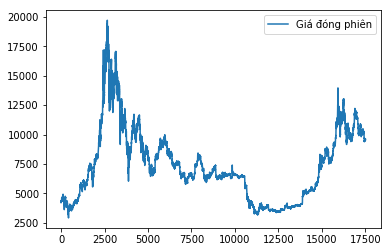

In [7]:
plt.plot(Close_lst, label='Giá đóng phiên')
plt.legend()
plt.show()

In [8]:
def strategy_01_current_price(threshold = 0.01):
    fee_assume = Decimal(threshold)
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST, PRICE_LIST
    A_FUND_AMOUNT = Decimal('1.0')
    B_FUND_AMOUNT = Decimal('0.0')
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    PRICE_LIST = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = 'buy'
    for NEW_PRICE in Close_lst[1:]:
        NEW_PRICE = Decimal(str(NEW_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and PREV_SIDE == 'buy':
            PRICE = NEW_PRICE
            sell()

            PREV_SIDE = 'sell'
            PRICE_LIST.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and PREV_SIDE == 'sell':
            PRICE = NEW_PRICE
            buy()

            PREV_SIDE = 'buy'
            PRICE_LIST.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)


    print("Number of trade: ", len(A_FUND_AMOUNT_LIST))

    print(A_FUND_AMOUNT, "  BTC")
    print(B_FUND_AMOUNT, "  USDT")

    print("Previous amount USDT is ", Decimal('1.0') *
          Decimal(Close_lst[0]), "  USDT")
    print("Current amount USDT is  ", A_FUND_AMOUNT *
          Decimal(Close_lst[-1]) + B_FUND_AMOUNT, "  USDT")

In [9]:
Close_lst = df.Close.values

strategy_01_current_price(threshold = 0.001)

Number of trade:  129
0.0070032224542097658815695239   BTC
2126.072554000000000000000000   USDT
Previous amount USDT is  4221.039999999999963620211929   USDT
Current amount USDT is   2193.215739183062499510607887   USDT


In [24]:
Close_lst = df.Close.values

strategy_01_current_price(threshold = 0.002)

Number of trade:  129
0.0092728947528001682321128224   BTC
2201.936439000000000000000000   USDT
Previous amount USDT is  4221.039999999999963620211929   USDT
Current amount USDT is   2290.840039255629022848107695   USDT


In [25]:
strategy_01_current_price(threshold = 0.05)

Number of trade:  17
0.009027525205779181192701448   BTC
6546.346901000000000000000000   USDT
Previous amount USDT is  4221.039999999999963620211929   USDT
Current amount USDT is   6632.898028084651720398039183   USDT


In [36]:
Close_lst = df.Close.values

strategy_01_current_price(threshold = 0.2/100)

Number of trade:  129
0.0092728947528001682321128224   BTC
2201.936439000000000000000000   USDT
Previous amount USDT is  4221.039999999999963620211929   USDT
Current amount USDT is   2290.840039255629022848107695   USDT


In [14]:
strategy_01_current_price(threshold = 0.5)

Number of trade:  3
0.005307663560715531416612686   BTC
16493.23773900000000000000000   USDT
Previous amount USDT is  4221.039999999999963620211929   USDT
Current amount USDT is   16544.12480415845333251518147   USDT


In [31]:
strategy_01_current_price(threshold = .12/100)

Number of trade:  121
0.0061893564027957809815621792   BTC
2274.207729000000000000000000   USDT
Previous amount USDT is  4221.039999999999963620211929   USDT
Current amount USDT is   2333.547997831112462234283410   USDT


In [16]:
# when first price is high [2500:]

In [32]:
Close_lst = df.Close.values
Close_lst = Close_lst[2500:]

In [29]:
df.iloc[2500].Timestamp

1512928800000.0

In [43]:
Close_lst = df.Close.values
Close_lst = Close_lst[2500:]
strategy_01_current_price(threshold = 10.0/100)

Number of trade:  6
1.403081315728755372949636041   BTC
0.00005000000000000000000   USDT
Previous amount USDT is  14975.03000000000065483618528   USDT
Current amount USDT is   13452.00007210996935670503063   USDT


In [33]:
strategy_01_current_price(threshold = 0.1)

Number of trade:  6
1.403081315728755372949636041   BTC
0.00005000000000000000000   USDT
Previous amount USDT is  14975.03000000000065483618528   USDT
Current amount USDT is   13452.00007210996935670503063   USDT


In [20]:
strategy_01_current_price(threshold = 0.12)

Number of trade:  8
1.763996959827066978191020295   BTC
0.00006600000000000000000   USDT
Previous amount USDT is  14975.03000000000065483618528   USDT
Current amount USDT is   16912.26799843320868626802134   USDT


# Check state of volume

No handles with labels found to put in legend.


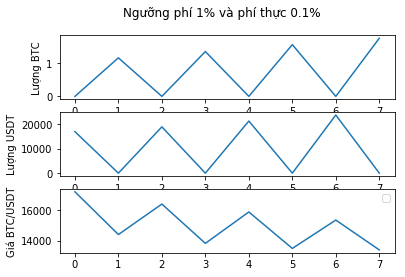

In [21]:
fig, axs = plt.subplots(3)
fig.suptitle('Ngưỡng phí 1% và phí thực 0.1%')
# axs[0].plot( A_FUND_AMOUNT_LIST, label='A Amount')
axs[0].plot(A_FUND_AMOUNT_LIST)
axs[0].set_ylabel('Lượng BTC')
axs[1].plot( B_FUND_AMOUNT_LIST)
axs[1].set_ylabel('Lượng USDT')
axs[2].plot( PRICE_LIST)
axs[2].set_ylabel('Giá BTC/USDT')

plt.legend()
plt.show()

In [22]:
A_FUND_AMOUNT_LIST[-4:]

[Decimal('0.001507316409672387685544847'),
 Decimal('1.570641637070608862616882621'),
 Decimal('0.000641637070608862616882621'),
 Decimal('1.763996959827066978191020295')]

In [23]:
B_FUND_AMOUNT_LIST[-4:]

[Decimal('21381.35716600000000000000000'),
 Decimal('0.00006600000000000000000'),
 Decimal('23856.95076600000000000000000'),
 Decimal('0.00006600000000000000000')]

# Modify threshold and compare